<a href="https://colab.research.google.com/github/affandhanbad-dev/Global-GDP-Analysis-Dashboard/blob/main/Global_GDP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [ ]:
dt = pd.read_csv('/content/countries of the world.csv')

In [ ]:
dt.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [ ]:
dt['Region'].value_counts()

,count
Region,
SUB-SAHARAN AFRICA,51
LATIN AMER. & CARIB,45
ASIA (EX. NEAR EAST),28
WESTERN EUROPE,28
OCEANIA,21
NEAR EAST,16
EASTERN EUROPE,12
C.W. OF IND. STATES,12
NORTHERN AFRICA,6


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [ ]:
dt.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,3
Infant mortality (per 1000 births),3
GDP ($ per capita),1
Literacy (%),18


In [ ]:
dt.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [ ]:
dt.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [ ]:
numeric_cols = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']

for col in numeric_cols:
    dt[col] = dt[col].astype(str).str.replace(',', '.', regex=False)
    dt[col] = pd.to_numeric(dt[col], errors='coerce')

for col in numeric_cols:
    dt[col] = dt[col].fillna(dt[col].median())

print("Missing values after imputation:")
print(dt.isnull().sum())

Missing values after imputation:
Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


In [ ]:
dt.shape

(227, 20)

In [ ]:
total_regions = dt['Region'].nunique()

total_countries = dt['Country'].nunique()

countries_per_region = dt['Region'].value_counts()

print("Total number of regions:", total_regions)
print("Total number of countries:", total_countries)
print("Total number of countries per each region:")
print(countries_per_region)

Total number of regions: 11
Total number of countries: 227
Total number of countries per each region:
Region
SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: count, dtype: int64


In [ ]:
gdp_agri_lit_avg = round(dt.groupby('Region')[['GDP ($ per capita)', 'Agriculture', 'Industry', 'Service', 'Literacy (%)']].mean(), 2)
gdp_agri_lit_avg

,GDP ($ per capita),Agriculture,Industry,Service,Literacy (%)
Region,,,,,
ASIA (EX. NEAR EAST),8053.57,0.18,0.30,0.52,79.55
BALTICS,11300.00,0.05,0.29,0.66,99.73
C.W. OF IND. STATES,4000.00,0.19,0.33,0.48,98.72
EASTERN EUROPE,9808.33,0.09,0.31,0.60,95.94
LATIN AMER. & CARIB,8682.22,0.09,0.26,0.65,90.70
NEAR EAST,10456.25,0.06,0.41,0.53,81.14
NORTHERN AFRICA,5475.00,0.13,0.40,0.43,71.45
NORTHERN AMERICA,26100.00,0.05,0.23,0.70,96.70
OCEANIA,8247.62,0.16,0.23,0.60,89.53


In [ ]:
gdp_agri_lit_avg_sorted = gdp_agri_lit_avg.sort_values(by='GDP ($ per capita)', ascending=False)

display(gdp_agri_lit_avg_sorted)

,GDP ($ per capita),Agriculture,Industry,Service,Literacy (%)
Region,,,,,
WESTERN EUROPE,27046.43,0.05,0.25,0.69,97.34
NORTHERN AMERICA,26100.00,0.05,0.23,0.70,96.70
BALTICS,11300.00,0.05,0.29,0.66,99.73
NEAR EAST,10456.25,0.06,0.41,0.53,81.14
EASTERN EUROPE,9808.33,0.09,0.31,0.60,95.94
LATIN AMER. & CARIB,8682.22,0.09,0.26,0.65,90.70
OCEANIA,8247.62,0.16,0.23,0.60,89.53
ASIA (EX. NEAR EAST),8053.57,0.18,0.30,0.52,79.55
NORTHERN AFRICA,5475.00,0.13,0.40,0.43,71.45


In [ ]:
def join_countries(data):
    return ', '.join(data.astype(str))

region_data = dt.groupby('Region').agg({
    'Country': join_countries,
    'Population': 'sum',
    'Area (sq. mi.)': 'sum',
    'Pop. Density (per sq. mi.)': 'mean',
    'Coastline (coast/area ratio)': 'mean',
    'Net migration': 'mean',
    'Infant mortality (per 1000 births)': 'mean',
    'GDP ($ per capita)': 'mean',
    'Literacy (%)': 'mean',
    'Phones (per 1000)': 'mean',
    'Arable (%)': 'mean',
    'Crops (%)': 'mean',
    'Other (%)': 'mean',
    'Climate': join_countries,
    'Birthrate': 'mean',
    'Deathrate': 'mean',
    'Agriculture': 'mean',
    'Industry': 'mean',
    'Service': 'mean'
})

region_data

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Region,,,,,,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),"Afghanistan , Bangladesh , Bhutan , Brunei , B...",3687982236,23096712,1264.825000,17.926786,1.372500,41.780000,8053.571429,79.553571,171.339286,15.874643,3.848929,80.276429,"1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.5, 2.0, 2.0, 2...",21.157857,7.637143,0.177643,0.302143,0.520107
BALTICS,"Estonia , Latvia , Lithuania",7184974,175015,39.833333,3.116667,-2.033333,8.103333,11300.000000,99.733333,292.866667,30.310000,0.610000,69.080000,"3.0, 3.0, 2.0",9.343333,12.630000,0.045000,0.293333,0.661667
C.W. OF IND. STATES,"Armenia , Azerbaijan , Belarus , Georgia , Kaz...",280081548,22100843,56.708333,0.093333,-2.033333,44.410000,4000.000000,98.725000,163.850000,19.454167,2.022500,78.523333,"4.0, 1.0, 4.0, 3.0, 4.0, 2.5, 2.0, 2.0, 2.0, 1...",17.855833,10.341667,0.192000,0.328000,0.480167
EASTERN EUROPE,"Albania , Bosnia & Herzegovina , Bulgaria , Cr...",119914717,1152222,100.900000,1.035000,-0.647500,12.686667,9808.333333,95.941667,280.750000,30.982500,2.430833,66.587500,"3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2...",11.072500,10.080833,0.092167,0.309250,0.598667
LATIN AMER. & CARIB,"Anguilla , Antigua & Barbuda , Argentina , Aru...",561824599,20544084,136.202222,15.972222,-1.494444,20.092667,8682.222222,90.695556,269.540000,10.790889,4.913556,84.295778,"2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.5, 2.0, 2...",19.081111,6.376000,0.091378,0.256822,0.647178
NEAR EAST,"Bahrain , Cyprus , Gaza Strip , Iraq , Israel ...",195068377,4355586,427.081250,3.602500,2.650000,23.377500,10456.250000,81.143750,207.056250,10.553750,5.105625,84.333125,"1.0, 3.0, 3.0, 1.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1...",25.031875,4.809375,0.063812,0.406000,0.530000
NORTHERN AFRICA,"Algeria , Egypt , Libya , Morocco , Tunisia , ...",161407133,6018890,38.933333,0.318333,-0.360000,29.263333,5475.000000,71.450000,112.866667,7.435000,2.805000,89.760000,"1.0, 1.0, 2.0, 2.0, 3.0, 1.0",20.476667,5.311667,0.129000,0.400500,0.432000
NORTHERN AMERICA,"Bermuda , Canada , Greenland , St Pierre & Miq...",331672307,21782471,260.860000,49.640000,-0.274000,8.628000,26100.000000,96.700000,686.740000,11.426000,0.048000,88.526000,"2.0, 2.0, 1.0, 2.0, 3.0",13.154000,7.694000,0.048000,0.228400,0.700600
OCEANIA,"American Samoa , Australia , Cook Islands , Fi...",33131662,8519812,131.180952,107.885714,-1.864286,20.279524,8247.619048,89.533333,189.885714,7.667143,14.719524,77.613333,"2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2...",21.950000,6.003810,0.157000,0.228762,0.599905


In [ ]:
dt.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [ ]:
top_20_countries_by_gdp_capita = dt.sort_values(by='GDP ($ per capita)', ascending=False).head(20)['Country']

display(top_20_countries_by_gdp_capita)

,Country
121,Luxembourg
154,Norway
214,United States
22,Bermuda
38,Cayman Islands
177,San Marino
196,Switzerland
54,Denmark
93,Iceland
12,Austria


/tmp/ipython-input-535542543.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP ($ per capita)', y='Country', data=dt.sort_values(by='GDP ($ per capita)', ascending=False).head(20),palette="Set1")


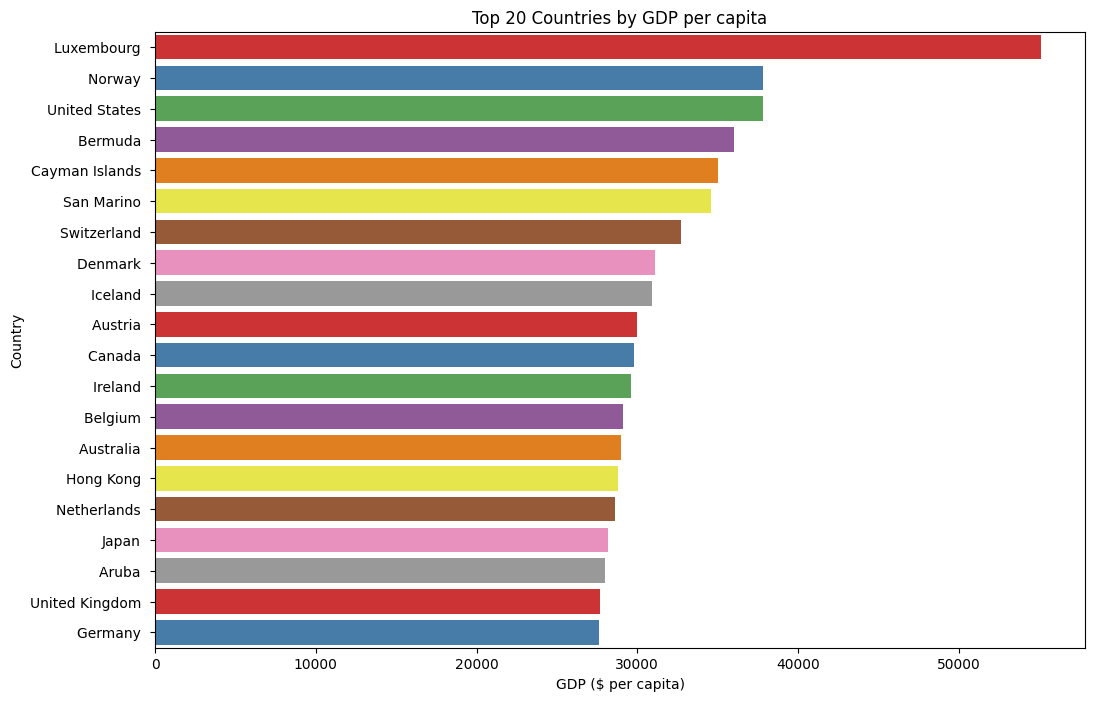

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Top 20 Countries by GDP per capita")
plt.xlabel("GDP ($ per capita)")
plt.ylabel("Country")
sns.barplot(x='GDP ($ per capita)', y='Country', data=dt.sort_values(by='GDP ($ per capita)', ascending=False).head(20),palette="Set1")
plt.show()

In [ ]:
 Top_liter = dt.sort_values(by='Literacy (%)', ascending=False).head(20)
 Top_liter

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.099,0.272,0.571
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700
54,Denmark,WESTERN EUROPE,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,54.02,0.19,45.79,3.0,11.13,10.36,0.018,0.246,0.735
68,Finland,WESTERN EUROPE,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.0,405.3,7.19,0.03,92.78,3.0,10.45,9.86,0.028,0.295,0.676
154,Norway,WESTERN EUROPE,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,0.00,97.13,3.0,11.46,9.40,0.021,0.415,0.564
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,23.28,0.40,76.32,2.0,11.94,8.41,0.010,0.130,0.860
119,Liechtenstein,WESTERN EUROPE,33987,160,212.4,0.00,4.85,4.70,25000.0,100.0,585.5,25.00,0.00,75.00,4.0,10.21,7.18,0.060,0.390,0.550
53,Czech Republic,EASTERN EUROPE,10235455,78866,129.8,0.00,0.97,3.93,15700.0,99.9,314.3,39.80,3.05,57.15,3.0,9.02,10.59,0.034,0.393,0.573
93,Iceland,WESTERN EUROPE,299388,103000,2.9,4.83,2.38,3.31,30900.0,99.9,647.7,0.07,0.00,99.93,3.0,13.64,6.72,0.086,0.150,0.765
114,Latvia,BALTICS,2274735,64589,35.2,0.82,-2.23,9.55,10200.0,99.8,321.4,29.67,0.47,69.86,3.0,9.24,13.66,0.040,0.261,0.699


In [ ]:
Liter_by_region = round(dt.groupby('Region')['Literacy (%)'].mean(), 2)
display(Liter_by_region)

,Literacy (%)
Region,
ASIA (EX. NEAR EAST),79.55
BALTICS,99.73
C.W. OF IND. STATES,98.72
EASTERN EUROPE,95.94
LATIN AMER. & CARIB,90.70
NEAR EAST,81.14
NORTHERN AFRICA,71.45
NORTHERN AMERICA,96.70
OCEANIA,89.53


In [ ]:
Literacy_by_region.sort_values(ascending=False)

,Literacy (%)
Region,
BALTICS,99.73
C.W. OF IND. STATES,98.72
WESTERN EUROPE,97.34
NORTHERN AMERICA,96.70
EASTERN EUROPE,95.94
LATIN AMER. & CARIB,90.70
OCEANIA,89.53
NEAR EAST,81.14
ASIA (EX. NEAR EAST),79.55


/tmp/ipython-input-3691151225.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Literacy (%)', y='Country', data=Top_literacy, palette="Set1", legend=False)


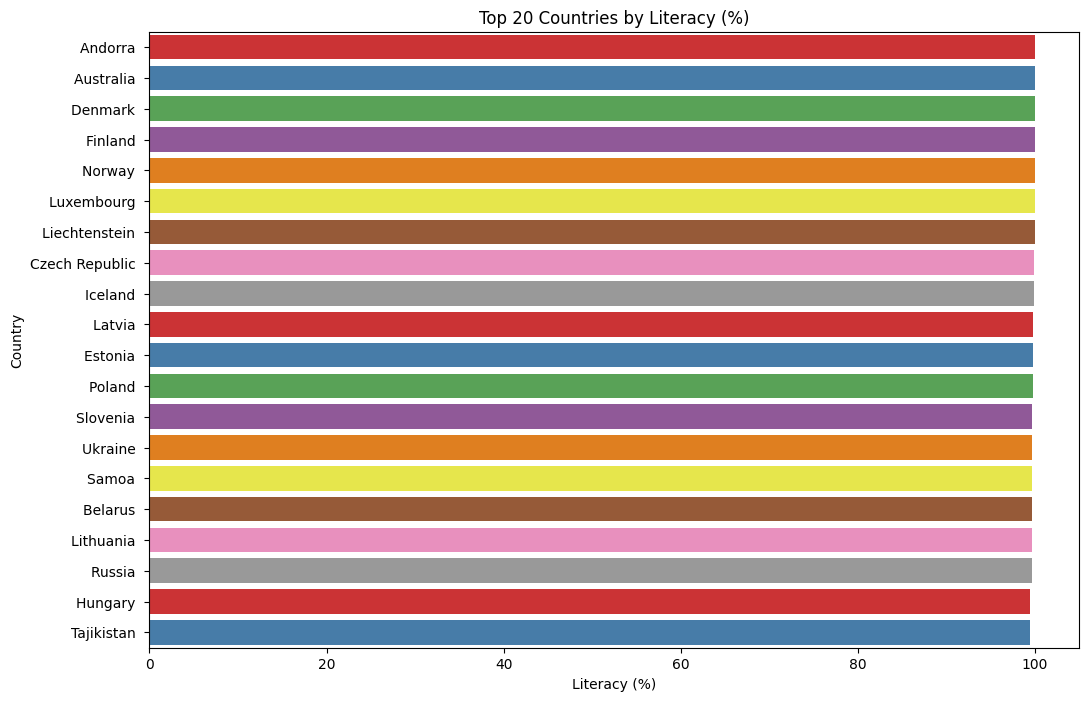

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Top 20 Countries by Literacy (%)")
plt.xlabel("Literacy (%)")
plt.ylabel("Country")
sns.barplot(x='Literacy (%)', y='Country', data=Top_literacy, palette="Set1", legend=False)
plt.show()

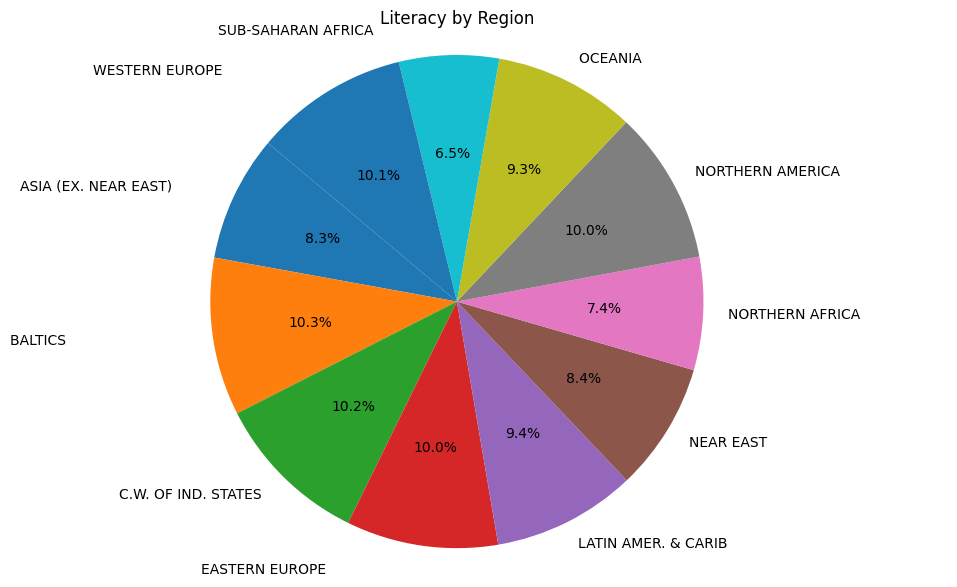

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(Literacy_by_region, labels=Literacy_by_region.index, autopct='%1.1f%%', startangle=140)
plt.title('Literacy by Region')
plt.axis('equal')
plt.show()

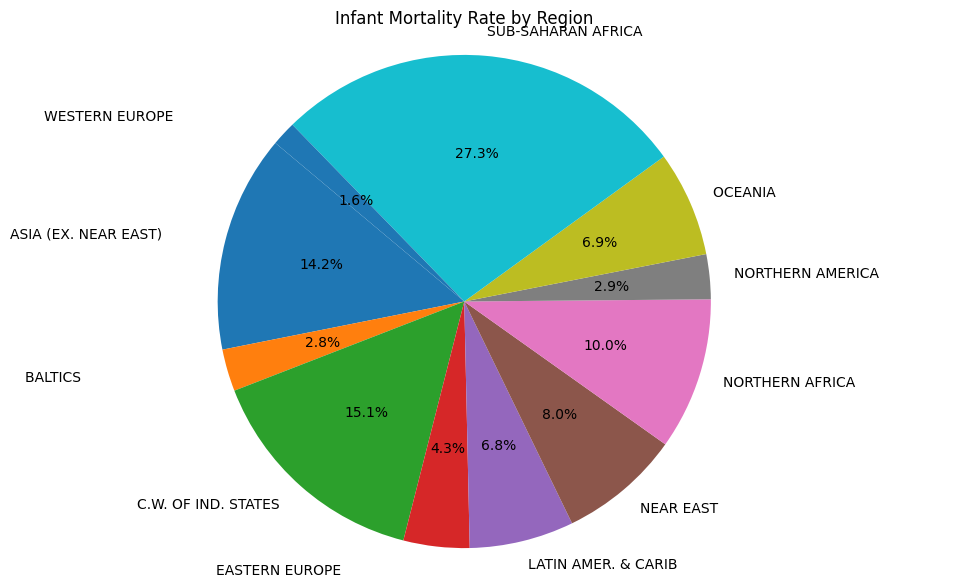

In [ ]:
infant_mortality_by_region = round(dt.groupby('Region')['Infant mortality (per 1000 births)'].mean(), 2)

plt.figure(figsize=(7, 7))
plt.pie(infant_mortality_by_region, labels=infant_mortality_by_region.index, autopct='%1.1f%%', startangle=140)
plt.title('Infant Mortality Rate by Region')
plt.axis('equal')
plt.show()

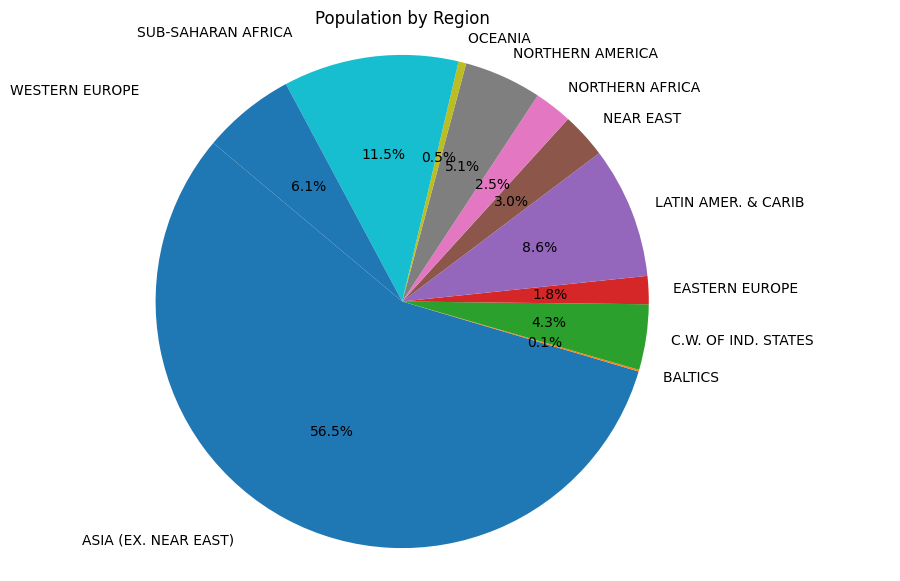

In [ ]:
population_by_region = region_data['Population']

plt.figure(figsize=(7, 7))
plt.pie(population_by_region, labels=population_by_region.index, autopct='%1.1f%%', startangle=140)
plt.title('Population by Region')
plt.axis('equal')
plt.show()

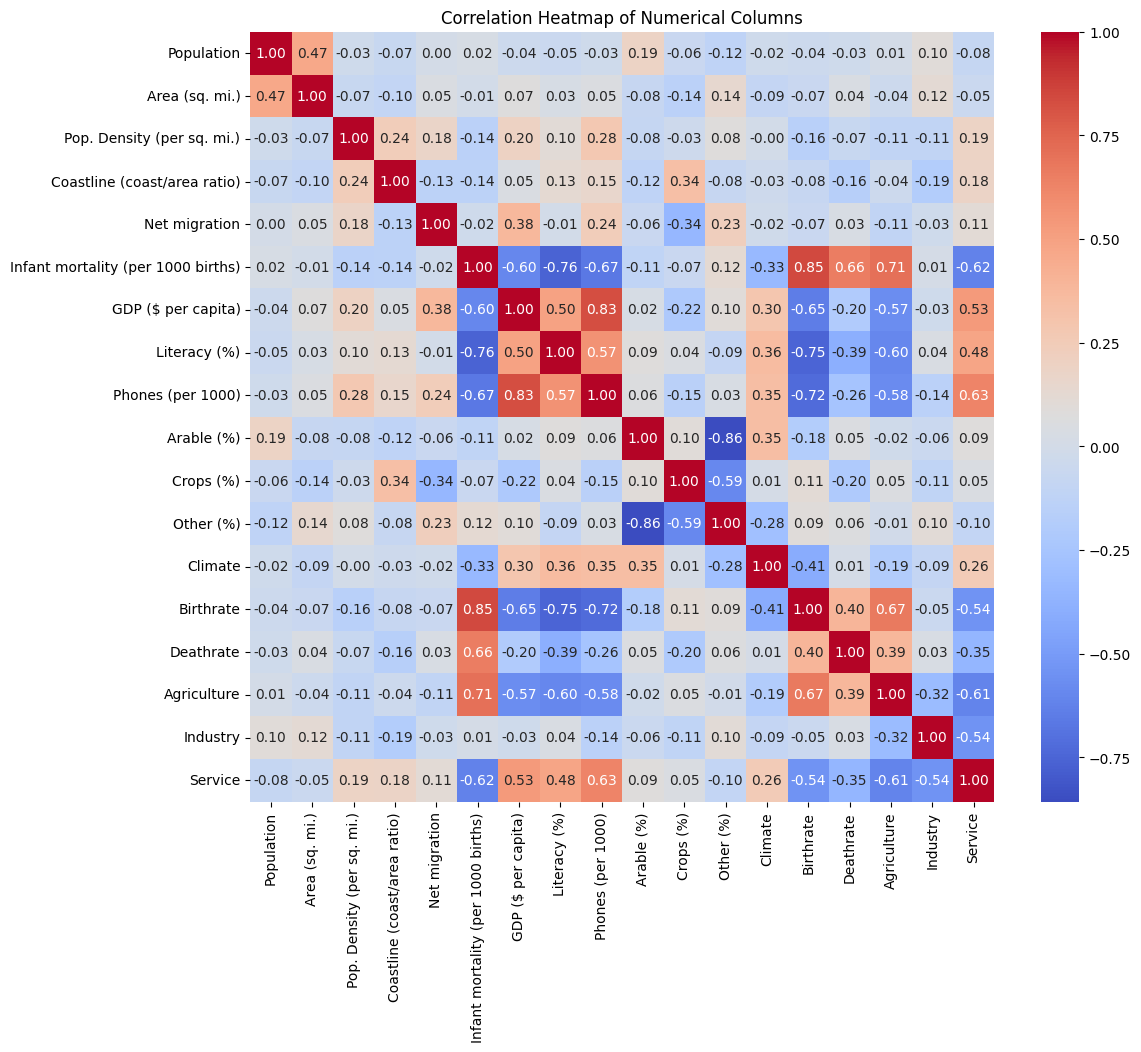

In [ ]:
numeric_dt = dt.select_dtypes(include=np.number)
correlation_matrix = numeric_dt.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [ ]:
X = dt.drop(['Country','Region','GDP ($ per capita)'],axis=1)
y = dt['GDP ($ per capita)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((181, 17), (46, 17), (181,), (46,))

In [ ]:
model = RandomForestRegressor(random_state=67)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=67)

In [ ]:
pred = model.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, pred))
print("Mean Squared Log Error:", mean_squared_log_error(y_test, pred))
print('accuracy',model.score(X_test,y_test)*100)

Mean Squared Error: 8111999.070652174
Mean Squared Log Error: 0.15352431623052662
accuracy 90.24478636609642


In [ ]:
model.predict(X_train.iloc[11].values.reshape(1,-1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([32761.])

In [ ]:
y_train.iloc[11]

np.float64(35000.0)

In [ ]:
import pickle
with open ('Global_GDP_EDA.sav','wb') as ref :
  pickle.dump(model, ref)